# Mesh between touching neighbors

In this notebook we visualize which cells in a tissue are neighbord by drawing a mesh. Furthermore, we can change the intensity of the mesh so that it corresponds to the distance between the centroids of the cells.

In [1]:
import pyclesperanto_prototype as cle
import numpy as np
from skimage.io import imshow
import matplotlib

# Test data
Let's generate some tissue-like structure consisting of cells which typicall have 6 neighbors

In [2]:
# define centroids of cells
pointlist = cle.push_zyx(np.asarray(
[
    [0, 100, 200, 300, 400, 50, 150, 250, 350, 0,  100, 200, 300, 400, 50,  150, 250, 350, 0,   100, 200, 300, 400],
    [0, 0,   0,   0,   0,   40,  40, 40,  40,  80, 80,  80,  80,  80,  120, 120, 120, 120, 160, 160, 160, 160, 160]
]))
print(pointlist)

[[  0. 100. 200. 300. 400.  50. 150. 250. 350.   0. 100. 200. 300. 400.
   50. 150. 250. 350.   0. 100. 200. 300. 400.]
 [  0.   0.   0.   0.   0.  40.  40.  40.  40.  80.  80.  80.  80.  80.
  120. 120. 120. 120. 160. 160. 160. 160. 160.]]


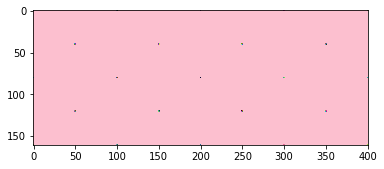

In [3]:
# generate an image where the centroid are labelled (labelled spots image)
labelled_spots = cle.pointlist_to_labelled_spots(pointlist)
cle.imshow(labelled_spots, labels=True)

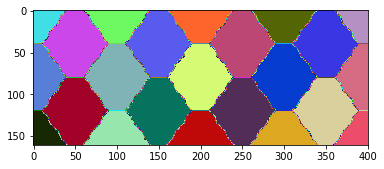

In [4]:
# extend the spots to make some artificial tissue image (label image)
cells = cle.extend_labeling_via_voronoi(labelled_spots)

cle.imshow(cells, labels=True)

# Draw a mesh between touching neighbors

In [5]:
pointlist = cle.label_centroids_to_pointlist(cells)
print(pointlist)

[[ 13.554028 100.       200.       300.       386.44598   50.000004
  150.       250.00002  350.00003   13.576469 100.00001  200.00002
  300.       386.4235    50.       150.       249.99998  350.
   13.845719 100.       200.       300.       386.15427 ]
 [ 15.785855  15.711423  15.711423  15.711423  15.785855  39.460003
   39.460003  39.460003  39.460003  79.46078   79.46001   79.46001
   79.46001   79.46078  119.65165  119.65165  119.65165  119.65165
  143.8476   143.92326  143.92326  143.92326  143.8476  ]]


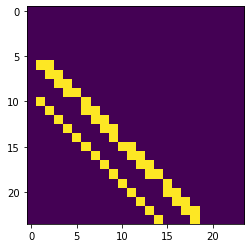

In [6]:
touch_matrix = cle.generate_touch_matrix(cells)
cle.imshow(touch_matrix)

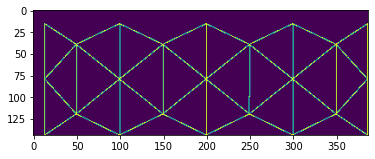

In [7]:
mesh = cle.touch_matrix_to_mesh(pointlist, touch_matrix)
cle.imshow(mesh)

# Analyse and visualize number of touching neighbors

In [8]:
number_of_touching_neighbors_vector = cle.count_touching_neighbors(touch_matrix)
print(number_of_touching_neighbors_vector)

[[0. 2. 3. 3. 3. 2. 5. 5. 5. 5. 4. 6. 6. 6. 4. 5. 5. 5. 5. 2. 3. 3. 3. 2.]]


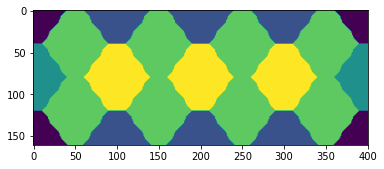

In [9]:
# visualize in a parametric image
parametric_image = cle.replace_intensities(cells, number_of_touching_neighbors_vector)
cle.imshow(parametric_image)

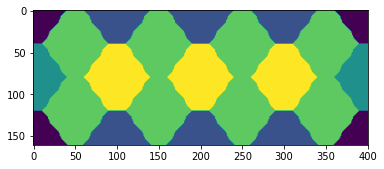

In [10]:
# Alternatively, in very short:
parametric_image = cle.touching_neighbor_count_map(cells)
cle.imshow(parametric_image)